## Data Preparation and Exploration.

This notebook is focused on preparing, cleaning and exploring a dataset that as been gathered at two solar power plants in India over a 34 day period

The goal is to apply this dataset to machine learning models to predict solar power plant output.


Points to look out for in a clean data:
* Making sure the data is presented in a way that makes sense with all the variables correct.
* Ensure that the variables make sense and are correct.
* Eliminating duplicate rows and columns as well as elimiating columns that provide redundant information.
* Dealing with missing data appropriately.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import warnings
warnings.filterwarnings("ignore")


### Preliminary Analysis
The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

In [2]:
### Reading in the data
generation_dataset = pd.read_csv('Plant_1_Generation_Data.csv')
weather_dataset = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [3]:
generation_dataset.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,15-05-2020 00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [4]:
generation_dataset.shape

(68778, 7)

Generation dataset contains 68778 rows and 7 columns

In [5]:
weather_dataset.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0


In [6]:
weather_dataset.shape

(3182, 6)

Weather dataset contains 3259 rows and 6 columns

Formatting DATE_TIME columns and merging the two dataframes.

In [7]:
generation_dataset['DATE_TIME'] = pd.to_datetime(generation_dataset['DATE_TIME'])
weather_dataset['DATE_TIME'] = pd.to_datetime(weather_dataset['DATE_TIME'])

In [8]:
df_solar_data = pd.merge(generation_dataset.drop(columns = ['PLANT_ID']), weather_dataset.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')



Extract separate date-related components


In [9]:
df_solar_data['DATE'] = df_solar_data['DATE_TIME'].dt.date
df_solar_data['TIME'] = df_solar_data['DATE_TIME'].dt.time
df_solar_data['WEEK'] = df_solar_data['DATE_TIME'].dt.isocalendar().week
df_solar_data['MONTH'] = df_solar_data['DATE_TIME'].dt.month
df_solar_data['DAY'] = df_solar_data['DATE_TIME'].dt.day

# add date as string column
df_solar_data["DATE_STRING"] = df_solar_data["DATE"].astype(str) # add column with date as string
# df_solar_data["HOURS"] = df_solar_data["HOURS"].astype(str)
df_solar_data["TIME"] = df_solar_data["TIME"].astype(str)

In [10]:
# A summary of each column, the datatypes and the number of non-null values 

df_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  WEEK                 68774 non-null  UInt32        
 12  MONTH                68774 non-null  int32         
 13  DAY                  68774 non-

Convert 'SOURCE_KEY' to numerical type

In [11]:
from sklearn.preprocessing import *

encoder = LabelEncoder()

df_solar_data['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar_data['SOURCE_KEY'])

df_solar_data.drop(columns=['SOURCE_KEY'], inplace=True)


In [12]:
df_solar_data.sample(10).style.background_gradient(cmap='Blues')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,WEEK,MONTH,DAY,DATE_STRING,SOURCE_KEY_NUMBER
6148,2020-05-18 01:30:00,0.000000,0.000000,0.000000,7037054.000000,20.983842,20.376831,0.000000,2020-05-18,01:30:00,21,5,18,2020-05-18,16
54406,2020-06-11 04:00:00,0.000000,0.000000,0.000000,6537903.000000,21.170427,19.669116,0.000000,2020-06-11,04:00:00,24,6,11,2020-06-11,20
42536,2020-06-05 12:15:00,5265.625000,516.312500,3859.000000,7320620.000000,27.640074,40.503802,0.323249,2020-06-05,12:15:00,23,6,5,2020-06-05,4
23136,2020-05-26 21:15:00,0.000000,0.000000,0.000000,7117880.000000,26.860954,25.539577,0.000000,2020-05-26,21:15:00,22,5,26,2020-05-26,6
22394,2020-05-26 12:15:00,13133.000000,1280.485714,4247.571429,7102358.571000,31.358138,59.133262,1.054156,2020-05-26,12:15:00,22,5,26,2020-05-26,16
9845,2020-05-19 21:00:00,0.000000,0.000000,6878.000000,7212476.000000,24.022574,21.449929,0.000000,2020-05-19,21:00:00,21,5,19,2020-05-19,7
59246,2020-06-13 11:00:00,11059.571430,1079.100000,2867.571429,6552254.571000,28.605963,49.595243,0.816753,2020-06-13,11:00:00,24,6,13,2020-06-13,20
10081,2020-05-19 23:45:00,0.000000,0.000000,0.000000,6216430.000000,22.638493,20.296448,0.000000,2020-05-19,23:45:00,21,5,19,2020-05-19,1
9162,2020-05-19 12:30:00,10440.000000,1020.500000,3498.000000,7045903.000000,29.644664,49.077840,0.738328,2020-05-19,12:30:00,21,5,19,2020-05-19,16
11880,2020-05-21 08:45:00,7525.285714,736.771429,766.857143,6825010.857000,25.483346,42.192908,0.558311,2020-05-21,08:45:00,21,5,21,2020-05-21,18


### Looking for null and missing values.

In [13]:
df_solar_data.isnull().sum()


DATE_TIME              0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
WEEK                   0
MONTH                  0
DAY                    0
DATE_STRING            0
SOURCE_KEY_NUMBER      0
dtype: int64

### Checking for Duplicate rows/ redundant information

In [14]:
#Checking for duplicate rows
df_solar_data.duplicated().sum()

0

In [15]:
#Checking for duplicate columns
df_solar_data.T.duplicated()

DATE_TIME              False
DC_POWER               False
AC_POWER               False
DAILY_YIELD            False
TOTAL_YIELD            False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
DATE                   False
TIME                   False
WEEK                   False
MONTH                  False
DAY                    False
DATE_STRING            False
SOURCE_KEY_NUMBER      False
dtype: bool

#Feature Matrix

In [59]:
X = df_solar_data.drop(columns = ['AC_POWER', 'DATE', 'TIME', 'WEEK', 'MONTH', 'DAY', 'DATE_STRING', 'DATE_TIME'], axis=1)
y = df_solar_data['AC_POWER']

In [60]:
# from sklearn.impute import SimpleImputer
# imputer_X = SimpleImputer(strategy='mean')
# imputer_y = SimpleImputer(strategy='mean')

# X_imputed = imputer_X.fit_transform(X)
# y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# # Ensure the shapes are correct
# print(f"Shape of X_imputed: {X_imputed.shape}")
# print(f"Shape of y_imputed: {y_imputed.shape}")


Shape of X_imputed: (68774, 7)
Shape of y_imputed: (68774,)


Separating dataset into testing and training dataset

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape, X_train.shape

((13755, 7), (55019, 7))

<Axes: >

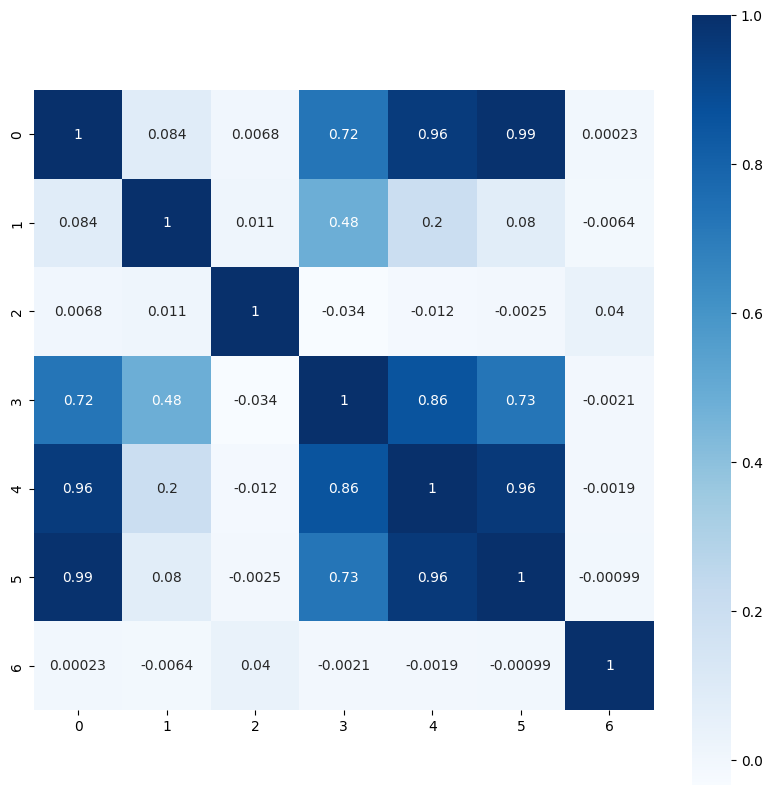

In [81]:
correlation = np.corrcoef(X_train, rowvar=False)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, cmap="Blues")

Therefore, we can conclude that as the ambient temerature of the Plant increases, the module tmeperature of the Plant also increases

### Solar Prediction

LINEAR REGRESSION

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

linr_score = 100*model_lr.score(X_test,y_test)
print(f'Linear Regression Model score = {linr_score:4.4f}%')

Linear Regression Model score = 99.9987%


Random forests

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Random Forest Regressor
model_RF = RandomForestRegressor( n_estimators=200,         # Increase number of trees
    max_depth=10,             # Limit the depth of the trees
    min_samples_split=20,     # Increase min samples required to split an internal node
    min_samples_leaf=20,       # Increase min samples required to be at a leaf node
    max_features='sqrt',      # Reduce the number of features to consider at each split
    random_state=42)
model_RF.fit(X_train, y_train)

# # Make predictions on test data
# y_pred = model_RF.predict(X_test)

# RF_Score = round(r2_score(y_pred,y_test) * 100, 2)

# print("RF Score : ",RF_Score,"%")

# train_predictions = model_RF.predict(X_train)
# train_mse = mean_squared_error(y_train, train_predictions)
# train_r2 = r2_score(y_train, train_predictions)

# # Predict on test set
# test_predictions = model_RF.predict(X_test)
# test_mse = mean_squared_error(y_test, test_predictions)
# test_r2 = r2_score(y_test, test_predictions)

# print(f"Training MSE: {train_mse:.2f}")
# print(f"Test MSE: {test_mse:.2f}")
# print(f"Training R-squared: {train_r2:.2f}")
# print(f"Test R-squared: {test_r2:.2f}")

# # Determine if overfitting or underfitting
# if train_r2 > test_r2:
#     print("The model may be overfitting.")
# elif train_r2 < test_r2:
#     print("The model may be underfitting.")
# else:
#     print("The model seems to be well-fit to the data.")

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=20,
                      min_samples_split=20, n_estimators=200, random_state=42)

In [84]:
# Check for NaN values
print(f"NaNs in X: {np.isnan(X).sum()}")
print(f"NaNs in y: {np.isnan(y).sum()}")


NaNs in X: DC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
SOURCE_KEY_NUMBER      0
dtype: int64
NaNs in y: 0


In [86]:
# Ensure there is no data leakage
print("Data leakage check")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data leakage check
X_train shape: (55019, 7)
X_test shape: (13755, 7)
y_train shape: (55019,)
y_test shape: (13755,)


In [85]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
print(cross_val_score(model_RF, X_train, y_train, cv=5, scoring='accuracy').mean())



nan
